<a href="https://colab.research.google.com/github/marco-finger/DSF-FS22-MarcoFinger/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2022-05-15 24:00
- Solutions in lecture on 2022-05-18
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

### Substask 1

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install pyheif

In [114]:
# https://www.linuxtut.com/en/c2a85dced32c08aca209/

from PIL import Image
import pyheif

def conv(image_path):
    new_name = image_path.replace('.HEIC', '.png')
    heif_file = pyheif.read(image_path)
    data = Image.frombytes(
        heif_file.mode,
        heif_file.size,
        heif_file.data,
        "raw",
        heif_file.mode,
        heif_file.stride,
        )
    data.save(new_name, "PNG")
    return new_name

In [45]:
# https://www.geeksforgeeks.org/python-loop-through-files-of-certain-extensions/

import os

path = "/content/drive/MyDrive/DSF-FS22/data/task2/"

file_names = []

for file in os.listdir(path):
  if file.endswith(".HEIC"):
    file_names.append(conv(path + file))
    print(path + file)
print("Done")

/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5379.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5379.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5387.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5387.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5386.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5386.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5385.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5385.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5384.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5384.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5383.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5383.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5382.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5382.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5381.png
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5381.HEIC
/content/drive/MyDrive/DSF-FS22/data/task2/IMG_5393.png
/content/drive/MyDrive/DSF-FS22/data/tas

### Subtask 2

In [111]:
import skimage.filters as skf
import skimage.morphology as skm

In [38]:
!pip install pillow_heif 

     |████████████████████████████████| 13.1 MB 23.4 MB/s 


(4032, 3024, 3) (4032, 3024)


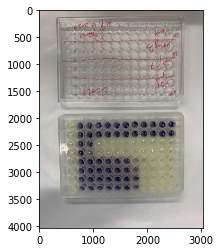

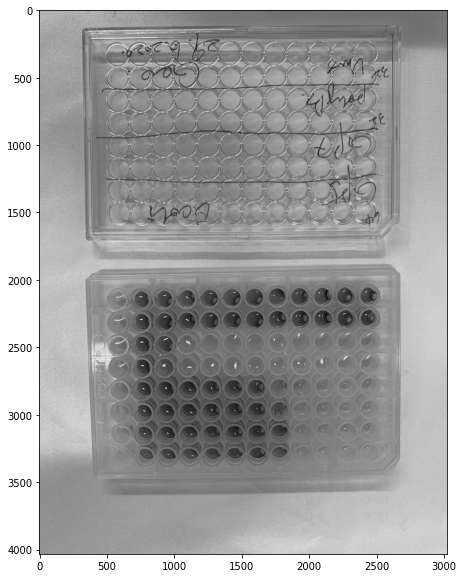

In [118]:
file_index = 3

#load image and show the B channel
imageRGB  = io.imread(file_names[file_index])
plt.imshow(imageRGB)
image = imageRGB[:,:,2]
print(imageRGB.shape,image.shape)
#plot image
plt.figure(figsize=(10,10))
plt.imshow(image,cmap = 'gray')
plt.show()

(1516, 3024)


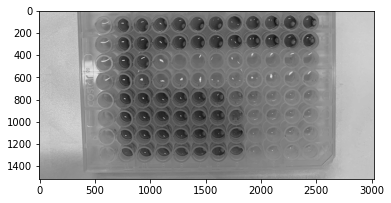

In [147]:
# We are only interested in the lower part, so let's do a crop
new_image = image[image.shape[0]//2:image.shape[0]-500,:]
print(new_image.shape)
plt.imshow(new_image, cmap ='gray')
plt.show()

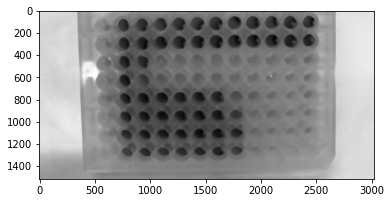

In [148]:
# There are some reflections or white dots in the black bins. Let's try to get rid of them with a filter.
image_mean = skf.median(new_image,selem=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show()

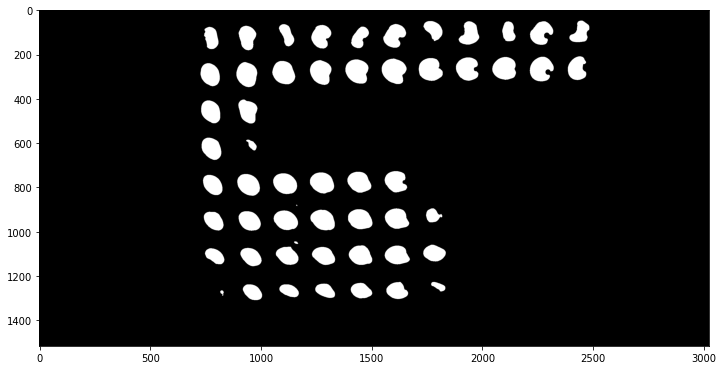

In [149]:
threshold_manual = 70

#create a mask using a logical operation
image_threshold = image_mean < threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

In [150]:
# make a png of threshold array
gugus = file_names[file_index].split(".")[0]+"_threshold.png"

im = Image.fromarray(image_threshold)
im.save(gugus)

### Subtask 3

Dots number: 55


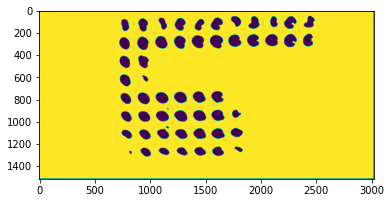

In [151]:
# https://stackoverflow.com/questions/48154642/how-to-count-number-of-dots-in-an-image-using-python-and-opencv
# https://www.geeksforgeeks.org/white-and-black-dot-detection-using-opencv-python/

import cv2
gray = cv2.imread(gugus, 0)

## threshold
th, threshed = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## findcontours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]
c_gray=cv2.drawContours(threshed,cnts,-1,(0,255,0),3)
plt.figure()
plt.imshow(c_gray)

## filter by area
s1= 3
s2 = 25000 // 2
xcnts = []
for cnt in cnts:
    if s1 < cv2.contourArea(cnt) < s2:
        xcnts.append(cnt)

print("Dots number: {}".format(len(xcnts)))
#Dots number: 23